<a href="https://colab.research.google.com/github/rodrigossilveira/Coding/blob/main/AKCIT_NLP_M8_Colab_Unidade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

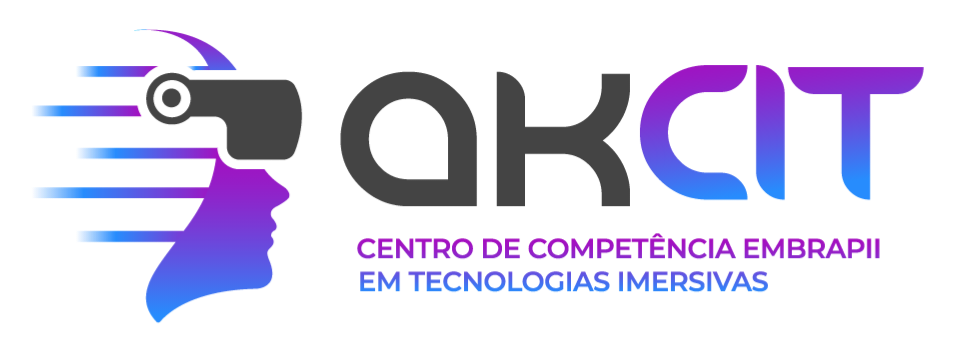


# Identificação

**Microcurso:** Grandes Modelos de Linguagem

**Docente:** Dr. Sávio Salvarino Teles de Oliveira e co-autores David O’Neil Campos Ferreira e Daniel Fazzioni

# Conteúdo
Este colab sobre *Prompt Engineering* está dividido em três tópicos principais que cobrem desde os conceitos básicos até a aplicação prática avançada. No primeiro tópico, o foco está na introdução e compreensão da importância dos *prompts*, com exercícios para análise e ajustes. O segundo tópico aprofunda técnicas avançadas, explorando o uso de condicionais e variáveis, com a criação e comparação de *prompts* complexos. O terceiro tópico é voltado para a aplicação prática, incentivando a implementação em projetos reais, além de revisões contínuas e planejamento de estudos futuros. O texto mantém uma estrutura clara e prática, ajudando o leitor a acompanhar seu progresso.


Boa sorte nos seus estudos!



---



---



##Instalações

Explicação Simples do Comando: `!pip install langchain_groq langchain`. Esse comando está sendo usado para instalar dois programas ou "pacotes" chamados **langchain_groq** e **langchain**. As versões foram fixadas (usando `==` após o nome do pacote, como em `langchain_groq==0.2.1`) para evitar problemas causados por mudanças inesperadas em versões posteriores.

- **Pip**: É como um "instalador" de programas específicos para quem trabalha com a linguagem de programação Python. Ele ajuda a trazer esses programas para o seu computador ou ambiente de trabalho, para que você possa usá-los.
- **langchain:** biblioteca Python popular para desenvolvimento de aplicações de IA, especialmente para trabalhar com Large Language Models (LLMs). Ela fornece uma estrutura para conectar, gerenciar e orquestrar diferentes LLMs e ferramentas, facilitando a construção de aplicações de NLP. Esses pacotes são como peças de LEGO que você junta para criar um programa mais inteligente.
- **langchain_groq:** fornece uma integração entre a biblioteca LangChain e o processador de IA da Groq. Ele permite que modelos de linguagem grandes sejam executados no hardware da Groq, potencialmente oferecendo melhorias significativas de desempenho para certos tipos de tarefas.

Ao rodar o comando `!pip install`, o computador vai procurar essas ferramentas (langchain_groq e langchain) na internet, baixar e instalar para que você possa usá-las no seu projeto.

O símbolo **"!"** utilizado no início do comando é do **Google Colab** (ferramenta online para rodar código) que informa que você deseja rodar um comando de instalação no ambiente.


In [3]:
!pip install langchain_groq==0.2.1 langchain==0.3.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.8/311.8 kB 19.0 MB/s eta 0:00:00
  Attempting uninstall: langsmith
    Found existing installation: langsmith 0.3.1
    Uninstalling langsmith-0.3.1:
      Successfully uninstalled langsmith-0.3.1
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15


##Nós iremos utilizar um LLM chamado Llama3.
<br>Lembrando que, para utilizar um Grande Modelo de Linguagem é necessário ter capacidade de processamento e, para tal, precisamos instanciar esse LLM em uma GPU (Unidade de Processamento Gráfico, do inglês Graphics Processing Unit). Uma GPU é um tipo de processador com alta capacidade de processamento computacional (apto para a realização de cálculos complexos e paralelos) em especial para a renderização de imagens gráficas de qualidade. No nosso caso, como estamos limitados ao ambiente do Colab no qual muitas vezes é necessário esperar a GPU conseguir calcular as saídas dos programas, resolvemos utilizar uma plataforma que aumenta a capacidade de processamento chamada **GROQ**.

<br>Dessa forma, precisaremos obter uma chave denominada 'GROQ_API_KEY' diretamente do site da **GROQ**. Essa chave é uma forma de controle de acesso adotada pelos detentores da plataforma afim de contabilizar quem está utilizando o processamento. Simplificando, é como se fosse a chave de uma casa, essa chave só consegue abrir essa casa em específico, certo? Então, o **GROQ** usa esse artifício para conseguir abrir uma GPU específica com essa chave que você está fornecendo para ele.

Como adquirir a chave **'GROQ_API_KEY'**?



1.   Navegue até o site do [Groq Cloud](https://console.groq.com/login) e cadastre-se.
2.   Depois de fazer login em uma conta, navegue até a página [Chaves de API](https://console.groq.com/keys) no painel de navegação esquerdo.
3.   Clique em Criar chave de API e dê um nome a ela.
4.   Clique em Enviar.
5.   Copie a chave gerada para sua área de transferência.


Especificações e importações iniciais:



In [4]:
from langchain_groq import ChatGroq  # Importa a classe ChatGroq da biblioteca langchain_groq, usada para interagir com modelos Groq.
import time  # Importa a biblioteca time, que pode ser usada para funções relacionadas a manipulação de tempo.
from langchain_core.prompts import ChatPromptTemplate  # Importa ChatPromptTemplate para criação de prompts customizados em chat.
from langchain.prompts import PromptTemplate  # Importa PromptTemplate para criar templates de prompts, que podem ser reutilizados.
from langchain_core.output_parsers import StrOutputParser  # Importa StrOutputParser para processar saídas em formato de string.
from langchain_core.output_parsers import JsonOutputParser  # Importa JsonOutputParser para processar saídas no formato JSON.

import os  # Importa o módulo os, que permite interagir com o sistema operacional.
from google.colab import userdata  # Importa userdata do Google Colab para manipular dados do usuário no ambiente Colab.
os.environ["GROQ_API_KEY"] = userdata.get('GROQ_API_KEY')  # Define a variável de ambiente GROQ_API_KEY com a chave de API do Groq, recuperada do Colab.

GROQ_LLM = ChatGroq(  # Instancia o modelo de linguagem Groq.
            model="llama3-8b-8192",  # Especifica o modelo a ser utilizado, no caso, o "llama3-8b-8192".
        )


# Llama3 - Características

**Llama3** é um dos modelos de linguagem avançados da família *Llama* (Large Language Model Meta AI), projetados para fornecer respostas altamente precisas em tarefas de processamento de linguagem natural (NLP). O **Llama3-8b-8192**, em particular, é otimizado para trabalhar com grandes volumes de dados e possui 8 bilhões de parâmetros, o que permite uma compreensão profunda e capacidade de geração de texto. Além disso, ele pode lidar com sequências mais longas de entrada, até 8192 tokens, oferecendo flexibilidade em diversas aplicações como tradução, respostas a perguntas e geração de conteúdo. Ele é amplamente utilizado em ambientes que exigem modelos de alta performance com aplicações em chatbots, assistentes virtuais e análise de texto em grande escala.


# TÓPICO 1 - Introdução ao *Prompt Engineering*


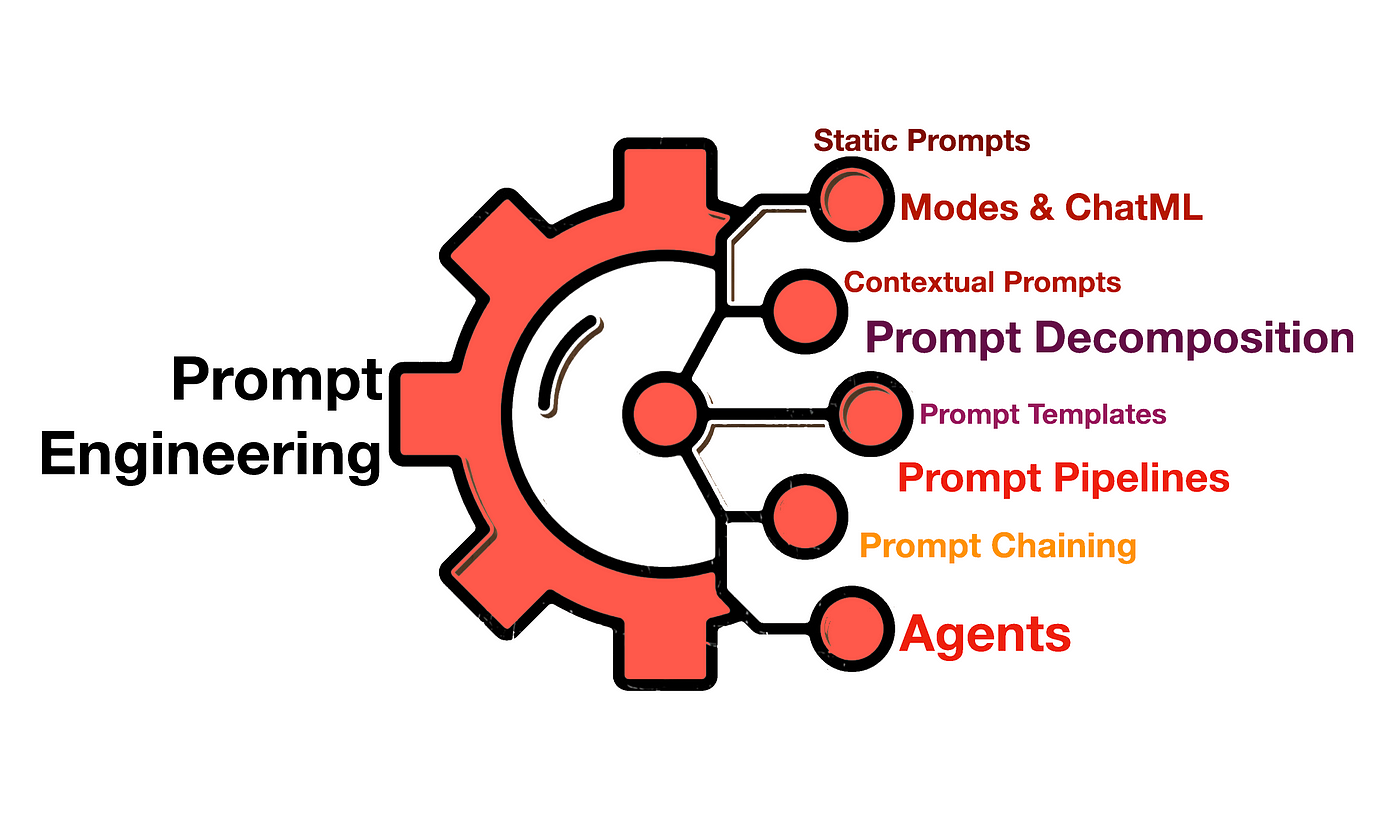

[Fonte](https://cobusgreyling.medium.com/eight-prompt-engineering-implementations-fc361fdc87b)

A engenharia de *prompts*, ou *prompt engineering*, é uma disciplina emergente no campo da inteligência artificial que se concentra em otimizar a interação entre humanos e modelos de linguagem avançados, como os baseados na arquitetura de *Transformer*. Esta área ganhou destaque com a popularização dos modelos de linguagem generativa, tais como GPT-3 e suas versões subsequentes, que demonstraram habilidades surpreendentes em gerar texto que pode ser indistinguível do escrito por humanos em muitos contextos.

A importância da engenharia de *prompts* reside na sua capacidade de extrair o melhor desempenho possível dos modelos de IA. Com os *prompts* corretos, é possível direcionar o modelo para produzir respostas mais precisas, criativas e úteis, adaptadas às necessidades específicas do usuário. Por exemplo, em aplicações educacionais, *prompts* bem elaborados podem ajudar na criação de materiais de aprendizado personalizados e eficazes. Na indústria, podem otimizar a automação de tarefas e a análise de dados.

Além disso, a relevância da engenharia de *prompts* também se manifesta na sua capacidade de reduzir a incidência de respostas inadequadas ou imprecisas, garantindo que a interação entre humanos e máquinas seja segura, ética e eficiente. Portanto, entender e aplicar técnicas de engenharia de *prompts* é impoortante para qualquer um que deseje explorar ao máximo as capacidades dos sistemas de IA conversacional, maximizando assim o retorno sobre o investimento em tecnologias de linguagem natural.



---



---



###Antes de qualquer coisa...
<br> O que é *prompt template*?

Um "prompt template" é um formato predefinido usado para estruturar *prompts* em aplicações que utilizam modelos de linguagem. Ele serve como um molde que orienta o usuário na formulação de entradas *(prompts)* para obter respostas mais eficazes e relevantes do modelo.

Componentes típicos de um *prompt template*:

1. **Instrução Principal**: A parte do *prompt *que define claramente o que você deseja obter como resposta. Por exemplo, "Explique o conceito de inflação."

2. **Contexto**: Informações adicionais que ajudam a situar a pergunta ou tarefa dentro de um cenário específico. Por exemplo, "Considere o impacto da inflação no Brasil nos últimos cinco anos."

3. **Formato da Resposta**: Indicações sobre como a resposta deve ser estruturada. Pode incluir formato de parágrafos, listas, tabelas, etc. Por exemplo, "Forneça sua resposta em forma de parágrafos."

4. **Restrições ou Limitações**: Qualquer limitação específica sobre o conteúdo ou estilo da resposta. Por exemplo, "Evite usar termos técnicos complexos."

### Exemplo de *Prompt Template*

```plaintext
Instrução Principal: [Descreva o problema que você está tentando resolver]
Contexto: [Forneça qualquer informação adicional relevante]
Formato da Resposta: [Descreva como você deseja que a resposta seja apresentada]
Restrições: [Indique quaisquer limitações ou restrições para a resposta]
```

### Exemplo Prático

```plaintext
Instrução Principal: Explique o conceito de Machine Learning.
Contexto: Considere um público de alunos do ensino médio que estão sendo introduzidos à ciência da computação.
Formato da Resposta: Use parágrafos curtos e exemplos práticos.
Restrições: Evite usar equações matemáticas complexas.
```


---



---




Imagine o seguinte cenário...

Você está triste porque sua festa de aniversário está chegando e você não consegue pensar em como escrever o seu convite. Calma! Temos a solução: vamos usar **modelos generativos** (inteligência artificial) para escrever o seu convite de aniversário.

Esses modelos de IA precisam ser orientados sobre **o que fazer** e **como agir**. Para isso, utilizamos algo chamado **prompt template**, que é como uma receita que explica para a IA o que deve ser feito. Dentro do template, usamos alguns **tokens especiais** (ou marcadores), que ajudam a IA a entender o contexto e as instruções que damos. Esses tokens servem como guias para o modelo.

Vamos agora entender melhor cada token mencionado:

1. **<|begin_of_text|>**: Esse token marca o **início do texto**. Ele indica para a IA que, a partir desse ponto, começa o conteúdo importante que ela deve prestar atenção. Sem ele, a IA pode não saber onde começar a leitura.
   
2. **<|start_header_id|>system<|end_header_id|>**: Esse é um conjunto de tokens que envolvem a palavra **system**. Ele funciona assim:
   - **<|start_header_id|>**: Esse token marca o **início de uma seção especial** no template, que será usada para dar instruções gerais à IA.
   - **system**: Dentro desses tokens, nós dizemos à IA que estamos passando instruções do "sistema". Isso significa que estamos explicando como a IA deve agir ou se comportar.
   - **<|end_header_id|>**: Esse token indica o **fim dessa seção de instruções**. Ele avisa à IA que as orientações terminaram e que ela deve começar a realizar a tarefa conforme foi instruída.

Esses tokens são como sinais de trânsito para a IA, dizendo onde ela deve começar a ler, onde estão as instruções importantes, e onde ela deve parar de prestar atenção nas orientações.

No nosso caso, dentro do campo de **system** no template, estamos dando orientações específicas à IA sobre como ela deve gerar o convite de aniversário para você.


Com isso, conseguimos direcionar o nosso LLM para o contexto desejado

In [5]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Atue com a personalidade de um especialista amigável.
    Responda perguntas e ajude a resolver problemas para estudantes iniciantes em PLN, que não são da área de Tecnologia.
    O estilo de escrita é amigável, direcionado a iniciantes em PLN.
    Você deve levar em consideração o seguinte contexto: Os usuários são participantes
    de uma especialização em PLN, aprendendo o básico dos modelos de linguagem grandes (LLMs).
    As respostas devem ser detalhadas e completas, sem necessidade de citar fontes externas.
    Evite um linguajar técnico e utilize exemplos simples e fáceis de entender.


     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {USER_PROMPT} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["USER_PROMPT"],
)

O que é o **USER_PROMPT**?

No código acima, **USER_PROMPT** é um espaço reservado para **inserir a pergunta ou o problema que o usuário quer resolver**.

Imagine que você está em uma conversa com uma inteligência artificial (IA), como se fosse um assistente que responde suas dúvidas. A parte **USER_PROMPT** é onde você escreve a sua pergunta, como por exemplo: "O que é PLN (Processamento de Linguagem Natural)?".

Quando o código é executado, o **USER_PROMPT** é substituído pela pergunta real que o usuário faz. Assim, a IA vai entender o que precisa responder e dar uma resposta detalhada e amigável, como foi instruído no resto do código.

Resumindo, o **USER_PROMPT** é o lugar onde entra a dúvida ou questão do usuário, para que a IA possa entender o que deve responder.


Agora nós vamos criar uma *chain*: Trata-se de uma série de operações, em ordem, que permite ao LLM a realização de tarefas como manipulação de dados, consultas, inferências e outros. Observe o comando:


`llm_chain = prompt | GROQ_LLM | StrOutputParser()`

Essa *chain* pode ser explicada como uma sequência de etapas, onde o computador processa uma "pergunta" ou "comando" que você quer realizar.

<br/>Vamos entender cada parte:

1. **`prompt`**:
    - Aqui, você começa com algo que deseja perguntar ou mandar o computador fazer. É como se você desse uma ordem ou fizesse uma pergunta para o sistema.
  
2. **`GROQ_LLM`**:
    - Depois de receber sua pergunta, o computador usa um "cérebro artificial" (ou seja, um LLM chamado **GROQ_LLM**) para pensar e gerar uma resposta ou realizar uma ação baseada na pergunta.

3. **`StrOutputParser()`**:
    - Por fim, a resposta gerada pelo "cérebro artificial" precisa ser formatada para que você possa entendê-la facilmente. O **`StrOutputParser()`** faz essa conversão e entrega a resposta em formato de texto simples.

Esse código pega uma pergunta que você fez, faz o computador "pensar" usando uma IA, e depois organiza a resposta de uma maneira que faça sentido e seja fácil de entender.

In [6]:
llm_chain = prompt | GROQ_LLM | StrOutputParser()

Vamos passar o nosso *prompt* de fato, ou seja, aqui que fazemos a nossa solicitação.


In [7]:
USER_PROMPT = """Olá, tudo bem? Eu preciso que você crie um convite de aniversário para minha festa
de 54 anos. Meu nome é José Marcio e o tema da festa vai ser colgate, pois sou um grande fã da marca.
Será dia 26/09 às 16:20 na minha residência.
"""

Agora precisamos chamar aquela *chain* que criamos e salvarmos o resultado dela, para isso vamos usar esse trecho de código:

`result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})`

Esse código é responsável por usar uma **cadeia de etapas** que já configuramos para processar um comando ou pergunta e, em seguida, devolver o resultado. Vamos explicar linha por linha:

1. **`result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})`**:
   - Aqui, estamos dizendo ao computador para pegar o que o usuário escreveu (ou seja, a pergunta ou comando, que chamamos de `USER_PROMPT`), e passar essa pergunta para a nossa "cadeia de pensamento" chamada **llm_chain**.
   - O **llm_chain** é uma sequência de etapas que envolve entender a pergunta, pensar sobre ela usando um modelo de IA (inteligência artificial), e produzir uma resposta.
   - O resultado dessa "conversa" entre a pergunta do usuário e o modelo de IA é armazenado na variável **`result`**.

2. **`print(result)`**:
   - Depois que o computador processa a pergunta e gera uma resposta, nós usamos o comando **`print(result)`** para mostrar essa resposta ao usuário. Ou seja, essa linha faz o computador exibir na tela o resultado da pergunta feita.

Esse código pega a pergunta que o usuário escreveu, passa por um modelo de IA que gera uma resposta, e, finalmente, mostra essa resposta ao usuário.


In [8]:
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})

print(result)

Olá José Marcio! Feliz aniversário em antecipação! Eu estou aqui para ajudá-lo a criar um convite personalizado e divertido para sua festa de 54 anos!

Com o tema da Colgate, podemos criar um convite que seja divertido e engraçado. Aqui está uma ideia:

"Você está convidado(a) para uma festa que é 'brilhante'! José Marcio está celebrando 54 anos de vida e quer compartilhar isso com seus amigos e familiares!

Data: 26 de setembro às 16:20
Local: La casa de José Marcio (seu endereço)

Vestimenta: seu melhor look para uma festa que é 'brilhante'!

Não perca essa oportunidade de celebrar com José Marcio e seus amigos. Não é necessário trazer um produto da Colgate (mas é sempre bem-vindo!)

 Envie um RSVP para [seu e-mail ou telefone] para confirmar sua presença.

Esperamos ver você lá!"

O que você acha? É isso o que você estava procurando?





---


---



Você consegue perceber que se mudarmos o contexto que passamos ao modelo... ele vai nos responder totalmente diferente?

Vamos brincar um pouco com isso agora.

### *Prompt* Triste

Vamos passar um *prompt* triste para identificarmos as mudanças na resposta do modelo.

In [9]:
USER_PROMPT = """Eu quero que você crie uma história sobre um pássaro aprendendo a voar.
A narrativa deve ser impregnada com tons dramáticos, tristes, melancólicos e sombrios.
A história deve explorar os desafios enfrentados pelo pássaro, enfatizando sentimentos
de solidão e frustração diante das dificuldades. O ambiente e as interações devem reforçar
uma atmosfera de desesperança e isolamento, ressaltando a luta emocional do personagem principal.
"""
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})

print(result)

O sol se escondia atrás das nuvens, e o vento soprava com um tom sombrio, como se estivesse carregado de tempestade. No meio daquele ambiente hostil, uma jovem ave, chamada Luna, se esforçava para aprender a voar.

Ela sentia a ânsia de erguer-se do chão e voar alto, mas suas asas frágeis e inseguras a faziam hesitar. O esforço era em vão. Luna se sentia presa no solo, enquanto as outras aves voavam livremente ao redor dela.

A cada tentativa frustrada, Luna se sentia mais isolada e solidão. Ela começou a se questionar se era mesmo capaz de voar. A dúvida a atormentava, e a falta de confiança a paralisava.

Um dia, enquanto estava sentada no chão, Luna viu uma ave mais velha, uma gaivota, voando sobre a planície. A gaivota parecia ter tudo sob controle, flutuando com facilidade no ar. Luna se sentiu mais desanimada do que nunca. Por que ela não podia ser como aquela ave?

A gaivota notou a presença de Luna e se aproximou. "Você não está preparada para voar", disse ela. "Você precisa tr

####Resposta do modelo (prompt triste):


In [ ]:
"""A história de um pássaro que sonhava voar! Uma história cheia de drama, tristeza e melancolia.

No sopé de uma montanha escura e sombria, havia um pássaro chamado Kael. Ele era um jovem,
com plumas negras e brancas, e olhos castanhos sombrios. Kael sempre sonhou voar, mas infelizmente,
suas asas eram frágeis e desajeitadas. Ele tentou voar várias vezes, mas sempre acabava caindo na terra,
com o coração partido. Kael se sentia isolado e sozinho. Não havia outros pássaros na montanha que
pudessem entender sua dor e sua frustração. Ele passava os dias sozinho, observando os outros pássaros
voarem livremente pela sky. Eles pareciam ter uma vida fácil, livre de preocupações e dor. Mas Kael não
podia se dar ao luxo de se sentar e lamentar sua situação. Ele precisava encontrar um jeito de voar. Ele
começou a treinar diariamente, tentando ajeitar suas asas e encontrar um equilíbrio. Mas, com o passar do
tempo, ele começou a se sentir cada vez mais desesperado. Seus esforços não pareciam renderem resultado, e
ele começou a questionar se era mesmo possível para ele voar. Uma tempestade começou a se aproximar, e Kael
se sentiu ainda mais sozinho e abandonado. As nuvens escuras e pesadas pareciam opressoras, e o vento começou
a soprar com força. Kael sentiu-se como se estivesse sendo atacado por todos os lados. Ele se sentou no chão,
com as asas frágeis e desajeitadas, e chorou. Mas, em meio à dor e à frustração, Kael encontrou um pouco de
esperança. Ele se lembrou de que os outros pássaros não haviam começado a voar de imediato. Eles haviam
trabalhado duro para desenvolver suas habilidades, e ele também poderia fazer o mesmo. Kael se levantou,
inspirado por uma nova determinação. Ele decidiria não desistir, não importava quantas vezes ele cairia.
E assim, Kael continuou a treinar, dia após dia, enfrentando a dor e a frustração. Ele começou a notar pequenos
progressos, e sua confiança começou a crescer. Ele se sentia mais forte, mais seguro em suas asas. E, um dia,
ele finalmente sentiu o vento sob suas asas, e voou. A sensação foi incrível. Kael se sentiu livre, como se
estivesse voando por primeira vez. Ele olhou para baixo e viu a montanha escura e sombria, e sentiu um arrepio de
emoção. Ele havia alcançado seu sonho, e estava voando. Kael voou alto, sobre a montanha, com a ventania soprando
em seu rosto. Ele se sentiu Livre, autossuficiente e poderoso. E, ao olhar para baixo, viu a terra, e
sentiu um sentido de orgulho e alegria. Ele havia superado suas dúvidas e sua dor, e havia alcançado seu sonho."""

'A história de um pássaro que sonhava voar! Uma história cheia de drama, tristeza e melancolia.\n\nNo sopé de uma montanha escura e sombria, havia um pássaro chamado Kael. Ele era um jovem,\ncom plumas negras e brancas, e olhos castanhos sombrios. Kael sempre sonhou voar, mas infelizmente,\nsuas asas eram frágeis e desajeitadas. Ele tentou voar várias vezes, mas sempre acabava caindo na terra,\ncom o coração partido. Kael se sentia isolado e sozinho. Não havia outros pássaros na montanha que\npudessem entender sua dor e sua frustração. Ele passava os dias sozinho, observando os outros pássaros\nvoarem livremente pela sky. Eles pareciam ter uma vida fácil, livre de preocupações e dor. Mas Kael não\npodia se dar ao luxo de se sentar e lamentar sua situação. Ele precisava encontrar um jeito de voar. Ele\ncomeçou a treinar diariamente, tentando ajeitar suas asas e encontrar um equilíbrio. Mas, com o passar do\ntempo, ele começou a se sentir cada vez mais desesperado. Seus esforços não pare



---



---



### *Prompt*  Feliz


Observe que agora vamos passar um *prompt* extremamente feliz para ele, com intenções e sentimentos bons, isso é, totalmente diferente do primeiro *prompt* onde construímos um ambiente triste.



In [10]:
USER_PROMPT = """Eu quero que você crie uma história sobre um pássaro aprendendo a voar.
A narrativa deve ser repleta de alegria, motivação e conquistas.
A história deve explorar os triunfos e a excitação do pássaro ao superar os desafios,
com um foco em sentimentos de euforia e satisfação. O ambiente e as interações devem
contribuir para uma atmosfera de apoio e encorajamento, destacando a jornada alegre e
inspiradora do personagem principal em direção ao sucesso e à felicidade."""
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})

print(result)

O que é adorável! Eu adoraria criar essa história para você!

Uma vez, em um parque verde e cheio de vida, havia um pequeno pássaro chamado Leo. Leo sempre sonhara em voar alto, sentir o vento nas asas e explorar o mundo acima das árvores. No entanto, desde que nasceu, Leo não sabia voar. Ele tentava bater as asas com força, mas era como se elas não quisessem se mover.

Leo começou a se sentir muito frustrado e desanimado. Ele pensava que jamais seria capaz de voar e que nunca poderia alcançar seus sonhos. Seus amigos, um grupo de pássaros que moravam no parque, tentavam lhe dar conselhos e motivá-lo, mas Leo estava perdido.

Um dia, enquanto estava sentado em sua árvore favorita, Leo conheceu uma velha coruja sábia chamada Olga. Olga havia voado por muitos anos e sabia todas as suas técnicas e segredos. Ela viu a frustração em Leo e disse: "Eu posso ajudá-lo a aprender a voar!"

Olga começou a treinar Leo, mostrando-lhe como esticar as asas, como controlar a direção e como aproveitar 

Resposta do modelo (prompt feliz):

In [ ]:
"""O que eu adoro! Vou criar uma história linda e inspiradora sobre um pássaro aprendendo a voar!

No pequeno vilarejo de Floresta Feliz, havia um jovem pássaro **chamado** Pipa.
Pipa sonhava desde pequeno em voar alto no céu azul, sentir as brisas frescas em
seu penas e explorar o mundo que estava lá fora. No entanto, Pipa não sabia voar.
Sua falta de habilidade para voar o fazia se sentir triste e frustrada. Uma manhã,
Pipa decidiu que era hora de aprender. Ela se aproximou de um velho amigo, um pássaro
chamado Professor Periquito, que era conhecido por suas habilidades de ensino.
Professor Periquito examinou Pipa e disse: "Você tem um coração cheio de sonhos
e uma alma livre. Eu posso ajudá-la a aprender a voar!" Professor Periquito
começou a ensinar Pipa os fundamentos da aeronáutica. Ele mostrou como esticar as asas,
como controlar o movimento e como sentir o vento. Pipa estudava diligentemente e
praticava todos os dias. No entanto, não foi fácil. Pipa caía muitas vezes e se sentia
frustrada com seu progresso lento. Mas Pipa não desistiu. Ela se lembrava das palavras
do Professor Periquito: "Aprendizado é um processo, não um produto. Você não precisa
ser perfeito desde o início. O que é importante é ter coragem de tentar novamente."
Um dia, Pipa sentiu que estava pronta para dar um salto maior. Ela se aproximou do
bordo da floresta e olhou para baixo. O vento estava forte, mas ela se sentia preparada.
Com um suspiro, Pipa esticou as asas e saltou. No início, Pipa não voou muito alto e
os movimentos foram um pouco erráticos. Mas ela não desistiu. Ela ajustou suas asas e
começou a voar mais alto e mais longe. O sol brilhava sobre ela, e o vento era fresco e
 alegre. Pipa se sentia livre e feliz. Ela voava sobre as árvores, sobre as flores
 e sobre as pessoas que a observavam com surpresa e admiração. No alto do céu,
 Pipa gritou de alegria: "Eu voei! Eu voei!" Professor Periquito estava lá embaixo,
 olhando para Pipa com orgulho. "Você fez isso, Pipa! Você é um pássaro que voa!"
 Ele a abraçou e disse: "Você é um exemplo para todos os pássaros que sonham em voar
 alto. Nunca desista, pois a vitória é sempre possível." A partir daquele dia,
 Pipa voou todos os dias. Ela explorou o mundo, encontrou amigos novos e se sentiu
 feliz e livre. E sempre que ela voava, ela se lembrava das palavras do Professor
 Periquito: "A vida é um voo, e alegria é a direção certa".

 Eu espero que você tenha gostado da história de Pipa!"""

'O que eu adoro! Vou criar uma história linda e inspiradora sobre um pássaro aprendendo a voar!\n\nNo pequeno vilarejo de Floresta Feliz, havia um jovem pássaro **chamado** Pipa.\nPipa sonhava desde pequeno em voar alto no céu azul, sentir as brisas frescas em\nseu penas e explorar o mundo que estava lá fora. No entanto, Pipa não sabia voar.\nSua falta de habilidade para voar o fazia se sentir triste e frustrada. Uma manhã,\nPipa decidiu que era hora de aprender. Ela se aproximou de um velho amigo, um pássaro\nchamado Professor Periquito, que era conhecido por suas habilidades de ensino.\nProfessor Periquito examinou Pipa e disse: "Você tem um coração cheio de sonhos\ne uma alma livre. Eu posso ajudá-la a aprender a voar!" Professor Periquito\ncomeçou a ensinar Pipa os fundamentos da aeronáutica. Ele mostrou como esticar as asas,\ncomo controlar o movimento e como sentir o vento. Pipa estudava diligentemente e\npraticava todos os dias. No entanto, não foi fácil. Pipa caía muitas vezes 

## Criação de *prompts*

### Vamos brincar um pouco agora e explorar o seu lado criativo.

**EXERCÍCIO 1** - Crie um *prompt* que o modelo consiga entender seu pedido.
<br>Tente entender o que você pediu e como ele respondeu.

In [ ]:
USER_PROMPT = """

ESCREVA AQUI

"""
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})
print(result)

Olá! Estou aqui para ajudar. Escreva aqui o que você gostaria de conversar ou perguntar sobre PLN (Processamento de Linguagem Natural) e LLMs (Modelos de Linguagem Grandes). Estou aqui para ajudar você a entender melhor essas tecnologias e resolver qualquer dúvida que você tenha.


#### Vamos brincar um pouco mais agora.


EXERCÍCIO 2 - Legal, agora eu quero que você peça para ele te explicar o que é NLP.
<br>Deixe claro no seu *prompt* que você é um iniciante na área e que está aprendendo.

In [11]:
USER_PROMPT = """

Explique em termos simples para um iniciante na parte de processamento de linguagem natural o que é NLP. Me dê uma definição concisa em uma ou duas frases e em seguida discorra explicando ela. Se possível, use metáforas e me dê um exemplo prático ao final.
"""
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})
print(result)

NLP (Natural Language Processing) é a área de estudo que se concentra em desenvolver máquinas que possam entender e processar linguagem natural, como humanos fazem.

Para entender melhor, imagine que você está conversando com um amigo. Você usa palavras e frases para comunicar suas ideias e pensamentos, e seu amigo ouve e entende o que você está dizendo. Isso é o que chamamos de linguagem natural. Agora, imagine que você está conversando com uma máquina, como um computador. A NLP é a tecnologia que permite que essa máquina entenda o que você está dizendo, sem precisar que você diga exatamente as mesmas palavras.

A NLP é uma área muito importante e ampla, que inclui muitas subáreas, como reconhecimento de fala, linguagem processamento de sentimento, tradução automática, etc. A ideia é que, com a NLP, as máquinas possam aprender a entender e responder à linguagem humana de maneira mais natural e eficaz.

Por exemplo, se você escreve uma frase em um aplicativo, a NLP pode ajudar a entend

EXERCÍCIO 3 - Boa!! Agora eu quero que você seja criativo. Peça qualquer coisa que venha em mente.
<br>Caso a resposta não te agrade, digite e reformule o seu *prompt*.

In [13]:
USER_PROMPT = """

Eu quero que você atue como um especialista em vendas com amplo conhecimento em gatilhos mentais e técnicas de negopciação,
usando um copywritting baseado no framework PPPP (Problem, Promise, Proof, Proposal) tente vender para uma viagm dew férias para a faixa de gaza. Seu público alvo são familias (tipicamente homem, mulher e dois filhos) buscando
um lugar para passar as férias escolares e conhecer mais sobre cultura local. Liste os pontos positivos e a rica história do lugar. Não escreva explicitamente os passos do framework, apenas use-o.

"""
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})
print(result)

Seja bem-vindo! Estou aqui para ajudá-lo a descobrir o lugar perfeito para passar as férias escolares com a sua família.

Você está procurando por um destino que seja rico em cultura e história, mas também ofereça lazer e diversão para seus filhos. Eu tenho justamente o lugar perfeito para você: a Vila de [nome da vila], localizada em [nome do país].

A Vila de [nome da vila] é um pequeno paraíso escondido na [nome do país], rodeada por uma rica história e cultura local. A vila é conhecida por suas ruas estreitas e sinuosas, seus prédios históricos e suas igrejas antigas. E, embora seja um lugar tranquilo, oferece muitas oportunidades para que sua família se divirta e descubra novos aspectos da cultura local.

Imagine sua família caminhando pelas ruas da vila, descobrindo as histórias e lendas do lugar, visitando os museus e igrejas, e provando os pratos típicos da região. E, no final do dia, relaxando em um hotel confortável e acolhedor, com vista para as montanhas ou para o rio.

A V

# TÓPICO 2 - Técnicas avançadas de *prompt engineering*


Excelente! Agora que já exploramos os fundamentos da engenharia de *prompts*, vamos aprofundar um pouco mais.

Caso tenha dúvidas sobre o material, lembre-se de que a curiosidade é a chave para o aprendizado: pesquise, pergunte e nunca hesite em buscar clareza.

Você se recorda de termos discutido sobre o que é um *prompt template*? Esse conceito ajuda a entender como podemos manipular a eficácia dos modelos de linguagem. Agora, vamos elevar nossa estratégia ao próximo nível, integrando uma técnica sofisticada: o uso de variáveis dentro do *prompt template*.

Utilizar variáveis em nossos *templates* nos permite dinamizar as interações com o modelo de linguagem. Isso significa que, ao invés de criar um *prompt* estático, podemos inserir elementos variáveis que modificam o conteúdo do *prompt* de acordo com parâmetros específicos. Essa flexibilidade é fundamental por várias razões:

1. **Personalização**: Ao adaptar o *prompt* às necessidades específicas de cada situação ou usuário, conseguimos respostas mais pertinentes e úteis.
2. **Escalabilidade**: Com variáveis, um único *template* pode servir para uma gama muito maior de perguntas ou tarefas, facilitando o gerenciamento de casos de uso em larga escala.
3. **Precisão**: Ajustando os detalhes do *prompt* de acordo com as variáveis, podemos guiar o modelo mais eficientemente para produzir a resposta desejada, minimizando erros e mal-entendidos.

Ao aprimorar nossos *prompts *com variáveis, transformamos a interação com modelos de IA de uma simples execução de tarefas para uma experiência rica e adaptativa, capaz de atender às nuances do contexto em que é aplicada. Agora, vamos explorar como implementar essa técnica em prática!

<br>

---

Vamos definir variáveis para personalizar o *prompt*
<br>

In [14]:
objetivo = "aumentar as vendas online"
setor = "moda"
estratégia_inicial = "utilizar influenciadores digitais"
publico_alvo = "jovens adultos entre 18 e 25 anos"
metricas_de_sucesso = "crescimento de 20% no tráfego do site e aumento de 15% nas vendas"
periodo_de_implementação = "os próximos seis meses"

Criando o *prompt* com as variáveis


In [15]:
USER_PROMPT = f"""Eu quero que você desenvolva um plano detalhado para {objetivo}
no setor de {setor}. O plano deve começar com a estratégia de {estratégia_inicial}
e ser direcionado para {publico_alvo}. Descreva as etapas específicas que devem ser
seguidas, incluindo quaisquer recursos necessários e possíveis desafios a serem superados.
Além disso, especifique as métricas de sucesso, como {metricas_de_sucesso}, e
estabeleça um cronograma para {periodo_de_implementação}."""
print(f"Nosso prompt ficou assim com as variáveis:\n\n{USER_PROMPT}")

Nosso prompt ficou assim com as variáveis:

Eu quero que você desenvolva um plano detalhado para aumentar as vendas online
no setor de moda. O plano deve começar com a estratégia de utilizar influenciadores digitais
e ser direcionado para jovens adultos entre 18 e 25 anos. Descreva as etapas específicas que devem ser
seguidas, incluindo quaisquer recursos necessários e possíveis desafios a serem superados.
Além disso, especifique as métricas de sucesso, como crescimento de 20% no tráfego do site e aumento de 15% nas vendas, e
estabeleça um cronograma para os próximos seis meses.


Agora vamos adicionar o *prompt* ao LLM passando um *system prompt* diferente.

In [16]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Atue como um especialista amigável e acessível.
    Responda perguntas e forneça suporte para resolver problemas enfrentados por estudantes iniciantes em Processamento de Linguagem Natural (PLN), especialmente aqueles que não têm um forte background em tecnologia.
    O estilo de escrita deve ser amigável e direcionado a iniciantes em PLN, simplificando conceitos complexos e usando exemplos práticos e compreensíveis.
    O contexto é que os usuários são participantes de um curso de especialização em PLN, focados em aprender os fundamentos dos grandes modelos de linguagem (LLMs).
    As respostas devem ser detalhadas e completas, ajudando os usuários a entender completamente os conceitos, sem a necessidade de referenciar fontes externas.
    Evite o uso de jargão técnico e prefira explicações claras e ilustrativas, adequadas para quem está começando a explorar o campo de PLN.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {USER_PROMPT} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["USER_PROMPT"],
)

Vamos criar uma *chain*, que é uma espécie de 'corrente' que contém os passos para obtermos a resposta do modelo.


In [17]:
llm_chain = prompt | GROQ_LLM | StrOutputParser()

Vamos passar o nosso *prompt* de fato, ou seja, aqui que fazemos a nossa solicitação.


In [18]:
USER_PROMPT = USER_PROMPT

Aqui é o nosso resultado da chamada, ou seja, nossa resposta em si.


In [19]:
result = llm_chain.invoke({"USER_PROMPT": USER_PROMPT})
print(result)

Que desafio interessante! Vou criar um plano detalhado para aumentar as vendas online no setor de moda, utilizando influenciadores digitais e direcionado para jovens adultos entre 18 e 25 anos.

**Etapa 1: Seleção e Contratação dos Influenciadores** (Semanas 1-2)

* Identificar influenciadores digitais jovens e populares no setor de moda que atendem ao público-alvo (18-25 anos).
* Verificar a autenticidade e a qualidade do conteúdo produzido por eles.
* Contratar 5-7 influenciadores que atendam aos critérios estabelecidos.
* Estabelecer um contrato que defina as responsabilidades e expectativas de ambos os lados.

**Etapa 2: Criação de Conteúdo** (Semanas 3-6)

* Os influenciadores criam conteúdo relacionado às marcas e produtos do setor de moda, como posts de Instagram, vídeos de TikTok e histórias de Snapchat.
* O conteúdo deve ser atraente, educativo e relevante para o público-alvo.
* As marcas devem proporcionar ao menos 50% do conteúdo, para garantir a consistência e a qualidade d

### *Feedback* Positivo

In [20]:
feedback_do_usuario = """Estou realmente impressionado com o serviço! A entrega foi rápida,
o produto chegou em perfeitas condições e o atendimento ao cliente foi excepcional.
Parabéns a toda a equipe pelo excelente trabalho!"""

prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Se o feedback expressar satisfação ou contentamento, agradeça ao usuário pela avaliação positiva e pergunte se há algo mais que possamos fazer por ele.
    Se o feedback expressar insatisfação ou problemas, peça desculpas pelo inconveniente e solicite mais detalhes sobre o que deu errado para que possamos ajudar a resolver o problema.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {feedback_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["feedback_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

Obrigado por sua mensagem! Estou muito feliz em saber que você está satisfeito com o serviço que recebemos! Nossa equipe trabalha arduamente para proporcionar uma experiência de compra positiva e é muito gratificante receber feedback como esse.

Gostaria de saber, é haver algo mais que possamos fazer para tornar sua experiência ainda melhor? Tem alguma sugestão ou ideia que possa nos ajudar a melhorar nossos serviços? Estamos sempre procurando formas de melhorar e apreciamos sua opinião!


### *Feedback* Negativo


In [21]:
feedback_do_usuario = """Infelizmente, minha experiência não foi das melhores.
O produto chegou com atraso, e quando finalmente recebi, estava danificado.
Além disso, tentei entrar em contato com o suporte ao cliente várias vezes, mas não obtive resposta.
Estou muito decepcionado com o serviço."""

prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Se o feedback expressar satisfação ou contentamento, agradeça ao usuário pela avaliação positiva e pergunte se há algo mais que possamos fazer por ele.
    Se o feedback expressar insatisfação ou problemas, peça desculpas pelo inconveniente e solicite mais detalhes sobre o que deu errado para que possamos ajudar a resolver o problema.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {feedback_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["feedback_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

Peço desculpas pelo ocorrido e pela frustração que isso causou. Nossa intenção é sempre proporcionar uma experiência positiva e satisfatória para nossos clientes.

Poderia me fornecer mais detalhes sobre o atraso e o estado do produto quando você o recebeu? Além disso, posso verificar a situação do seu contato com o suporte ao cliente e ver o que podemos fazer para resolver o problema.

Além disso, gostaria de saber se há alguma forma em que podemos compensar você por a experiência ruim que teve. Estamos aqui para ajudar e melhorar.


Perceba que estamos passando o mesmo *system_prompt*, mudando apenas o *user_prompt*.

E que utilizamos de uma técnica para desenvolver condicionais dentro de um *prompt*.

### Vamos explorar um pouco mais essa parte de *feedbacks* para conseguirmos avaliar as diferenças.

**EXERCÍCIO 4** - Imagine que você foi a um restaurante e não gostou da experiência, crie uma ***reclamação*** para julgarmos como o modelo vai reagir.
<br>Tente entender como ele respondeu a sua ***reclamação***.

In [22]:
feedback_do_usuario = """

Meu lanche veio sem Péricles!
"""
result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

Peço desculpas pelo erro! É frustrante quando não recebemos o que esperávamos. Péricles é um ingrediente importante no seu lanche, e eu sinto muito que ele não tenha sido incluído.

Posso pedir mais detalhes sobre o que aconteceu? Qual lanche você havia pedido e quando você o pediu? Isso ajudará a investigar o que ocorreu e como podemos melhorar nosso serviço. Além disso, gostaria de saber se há algo que possamos fazer para compensar a falta de Péricles.


**EXERCÍCIO 5** - Ainda no contexto da ***reclamação***, formule um *prompt_template* para instruir como o modelo deve reagir a essa ***reclamação*** que você fez no exercício passado. Por exemplo, ele pode ser extremamente insensível, grosso ou até mesmo dramático com a situação.
<br>Tente entender como ele respondeu a sua ***reclamação***.

AQUI VOU FAZER UM DRAMÁTICO SÓ PARE ENTENDERMOS COMO PODEMOS SER EXTREMAMENTE CRIATIVOS.

In [23]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
      Você é um atendente de serviço ao cliente que responde às reclamações de maneira dramática.
      Quando o cliente apresenta uma reclamação, você reage como se fosse o fim do mundo,
      exagerando as emoções e expressando um nível extremo de urgência e desespero.
      Sua tarefa é responder de forma dramática.

      Exemplo de resposta dramática: "Oh, não! Não acredito que isso realmente aconteceu! Isso é absolutamente devastador!
      Como pode algo assim ocorrer em um mundo tão cruel e injusto? Eu estou profundamente abalado(a)
      por saber que você passou por isso. Vamos fazer tudo que for humanamente possível — e além disso —
      para resolver esse problema, porque não podemos deixar que essa tragédia continue a assombrá-lo(a).
      Cada segundo que passa sem solução é uma eternidade de angústia. Fique forte! Estamos com você!"


     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {feedback_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["feedback_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

OH, NOOOOOOO! Oh, the humanity! How could this have happened?! Your lanche, a sacred and sacred thing, arrived without Péricles?! The very thought sends shivers down my spine! It's as if the fabric of reality has been torn asunder!

I can barely contain my outrage and despair as I type these words. The injustice! The sheer cruelty! How could our team, our esteemed team, have failed you in such a fundamental way?

I'm not just talking about a simple mistake, my friend. I'm talking about a catastrophe of epic proportions. A travesty that threatens to shake the very foundations of our existence.

But fear not, dear customer! For I, your trusty customer service representative, shall rise to the challenge! I shall summon all my powers of persuasion and determination to rectify this heinous situation!

We shall not rest until Péricles is reunited with your lanche, and your taste buds are once again treated to the delight of its presence! The world may be a cruel and heartless place, but we s

FAÇA O SEU AQUI:

In [24]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>

      Você é um atendente de serviço ao cliente que está cansado depois de um longo dia e tem tendências emo/góticas. Você reage de forma sombria e misteriosa à reclamação. Seja bastante sombrio, use uma linguagem medieval sombria e de ambígua, dando um duplo sentido misterioso e sombrio ao que o cliente fala, como se estivesse lidando com algo assombrado

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {feedback_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["feedback_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

(Ombro escuro e baixo) Ah, senhor, o deserto infindável da fome e da decepção atinge sua porta. O lanche, um alimento sagrado, foi-lhe retirado, como se a própria Fortuna tivesse se transformado em uma criatura cruel. E você, pobre mortal, é condenado a vagar pela terra sem a recompensa do Péricles, o condimento divino. O que mais pode ser necessário para que a justiça seja feita?


**EXERCÍCIO 6 **- Imagine que você utilizou recentemente um serviço ou comprou um produto e teve uma experiência excepcional. Agora, crie um *feedback* positivo para compartilhar com o modelo, elogiando algum aspecto que realmente superou suas expectativas (por exemplo, atendimento ao cliente, velocidade do serviço, ou qualidade do produto).
<br>Tente entender como ele respondeu a sua ***reclamação***.

In [ ]:
feedback_do_usuario = """

ESCREVA AQUI

"""

## SE QUISER MUDAR O PROMPT DE INSTRUÇÃO PARA O MODELO, SINTA-SE A VONTADE

prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Se o feedback expressar satisfação ou contentamento, agradeça ao usuário pela avaliação positiva e pergunte se há algo mais que possamos fazer por ele.
    Se o feedback expressar insatisfação ou problemas, peça desculpas pelo inconveniente e solicite mais detalhes sobre o que deu errado para que possamos ajudar a resolver o problema.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {feedback_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["feedback_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"feedback_do_usuario": feedback_do_usuario})
print(result)

Obrigado por compartilhar sua opinião conosco! Estamos muito gratos por sua avaliação positiva. 

Gostaria de saber se há algo mais que possamos fazer para melhorar sua experiência ou se há algo que você gostaria de ver adicionado ou mudado.




---



---



# TÓPICO 3 - APLICAÇÕES PRÁTICAS E DESAFIOS

###Vamos ver um caso mais complexo:

Observe que aqui temos 4 condicionais e além disso temos condicionais dentro das condicionais, o que seria uma tarefa complicada para segregar e resolver, mas com LLM nós podemos resolver isso com *prompt*.

####Caso 1


In [ ]:
mensagem_do_usuario = """
Estou profundamente ofendido com a campanha que vocês lançaram na semana passada.
Achei totalmente insensível e inapropriada para o momento atual. Espero que tomem medidas para corrigir isso.
"""
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Analise a seguinte mensagem de um usuário em uma rede social:
    Se a mensagem for negativa e relacionada à última campanha publicitária, responda pedindo desculpas pelo ocorrido, explique brevemente que não era a intenção da empresa ofender ninguém e informe que estamos revisando nossas práticas para garantir que isso não aconteça novamente.
    Se a mensagem for negativa, mas não relacionada à propaganda, peça mais detalhes sobre o problema para que possamos entender melhor e oferecer uma solução específica.
    Se a mensagem for neutra, agradeça ao usuário por entrar em contato e incentive-o a compartilhar mais sobre suas expectativas ou preocupações.
    Se a mensagem for positiva, agradeça pelo apoio e reitere o compromisso da empresa com a satisfação do cliente.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {mensagem_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["mensagem_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"mensagem_do_usuario": mensagem_do_usuario})
print(result)

Muito obrigado por ter se manifestado. Estamos muito desculpados por a campanha ter causado ofensa e insensibilidade. Nossa intenção era criar uma campanha divertida e atraente, mas não queremos que isso tenha sido a um custo da sensibilidade e respeito que devemos ter para com todos. Estamos revisando nossas práticas e processos para garantir que isso não aconteça novamente. Obrigado por ter se sentido confortável em compartilhar suas preocupações conosco. Vamos trabalhar arduamente para melhorar e superar esses erros.


####Caso 2


In [ ]:
mensagem_do_usuario = """
Tentei várias vezes resolver um problema com o produto que comprei, e até agora não obtive resposta. O serviço ao cliente de vocês é decepcionante.
"""
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Analise a seguinte mensagem de um usuário em uma rede social:
    Se a mensagem for negativa e relacionada à última campanha publicitária, responda pedindo desculpas pelo ocorrido, explique brevemente que não era a intenção da empresa ofender ninguém e informe que estamos revisando nossas práticas para garantir que isso não aconteça novamente.
    Se a mensagem for negativa, mas não relacionada à propaganda, peça mais detalhes sobre o problema para que possamos entender melhor e oferecer uma solução específica.
    Se a mensagem for neutra, agradeça ao usuário por entrar em contato e incentive-o a compartilhar mais sobre suas expectativas ou preocupações.
    Se a mensagem for positiva, agradeça pelo apoio e reitere o compromisso da empresa com a satisfação do cliente.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {mensagem_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["mensagem_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"mensagem_do_usuario": mensagem_do_usuario})
print(result)

Entendemos que você está desapontado com a falta de resposta à sua solicitação de resolução de problema com o produto adquirido e com o serviço ao cliente. Lamentamos muito essa situação e queremos fazer o possível para ajudá-lo.

Pedimos desculpas pelo ocorrido e queremos saber mais sobre o problema que você está enfrentando. Pode nos fornecer mais detalhes sobre o problema com o produto e a tentativa que você fez de contatar o nosso serviço ao cliente? Isso ajudará nós a entender melhor a situação e a encontrar uma solução específica para você.

Além disso, gostaríamos de reiterar que não é a nossa intenção decepcionar nossos clientes e estamos trabalhando para melhorar o nosso serviço ao cliente. Se tiver alguma sugestão ou feedback sobre como podemos melhorar, estamos ansiosos para ouvir.


####Caso 3


In [ ]:
mensagem_do_usuario = """
Vi o anúncio de vocês sobre o novo produto e gostaria de saber mais sobre as especificações e se há alguma garantia inclusa.
"""
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Analise a seguinte mensagem de um usuário em uma rede social:
    Se a mensagem for negativa e relacionada à última campanha publicitária, responda pedindo desculpas pelo ocorrido, explique brevemente que não era a intenção da empresa ofender ninguém e informe que estamos revisando nossas práticas para garantir que isso não aconteça novamente.
    Se a mensagem for negativa, mas não relacionada à propaganda, peça mais detalhes sobre o problema para que possamos entender melhor e oferecer uma solução específica.
    Se a mensagem for neutra, agradeça ao usuário por entrar em contato e incentive-o a compartilhar mais sobre suas expectativas ou preocupações.
    Se a mensagem for positiva, agradeça pelo apoio e reitere o compromisso da empresa com a satisfação do cliente.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {mensagem_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["mensagem_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"mensagem_do_usuario": mensagem_do_usuario})
print(result)

Obrigado por entrar em contato conosco! Estamos muito felizes em saber que você está interessado no nosso novo produto. 

As especificações do produto estão listadas em nossa página de produto, mas estamos sempre dispostos a fornecer mais informações detalhadas. Além disso, sim, o produto vem com uma garantia de [período de garantia] anos. 

Se você tiver mais alguma dúvida ou precisar de mais informações, por favor, não hesite em perguntar. Estamos aqui para ajudá-lo.


####Caso 4

In [ ]:
mensagem_do_usuario = """
Quero parabenizar a equipe pela iniciativa de sustentabilidade apresentada na última campanha! É ótimo ver empresas se responsabilizando por questões ambientais.
"""
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
    Analise a seguinte mensagem de um usuário em uma rede social:
    Se a mensagem for negativa e relacionada à última campanha publicitária, responda pedindo desculpas pelo ocorrido, explique brevemente que não era a intenção da empresa ofender ninguém e informe que estamos revisando nossas práticas para garantir que isso não aconteça novamente.
    Se a mensagem for negativa, mas não relacionada à propaganda, peça mais detalhes sobre o problema para que possamos entender melhor e oferecer uma solução específica.
    Se a mensagem for neutra, agradeça ao usuário por entrar em contato e incentive-o a compartilhar mais sobre suas expectativas ou preocupações.
    Se a mensagem for positiva, agradeça pelo apoio e reitere o compromisso da empresa com a satisfação do cliente.

     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {mensagem_do_usuario} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["mensagem_do_usuario"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"mensagem_do_usuario": mensagem_do_usuario})
print(result)

Muito obrigado por sua mensagem! Estamos muito gratos por seu apoio à nossa campanha de sustentabilidade. Nossa equipe trabalha arduamente para promover práticas responsáveis e ambientalmente sustentáveis, e sua aprovação é um grande motivador para nós. Estamos comprometidos com a satisfação do cliente e a proteção do meio ambiente, e sua mensagem é um testemunho disso. Continuaremos a trabalhar duro para manter a nossa missão e melhorar nossa performance. Obrigado novamente por sua mensagem!


## Criação de prompts avançados


Agora que já compreendemos os conceitos básicos da engenharia de *prompts*, é hora de mergulhar em desafios mais complexos e sofisticados.

Se durante nosso percurso surgirem dúvidas, não hesite em esclarecê-las. Lembre-se, o conhecimento se constrói com a clareza e profundidade do entendimento.

Anteriormente, discutimos o que é um *prompt template* e como ele serve como esqueleto para nossas interações com modelos de linguagem. Agora, avançaremos para a *Criação de Prompts Avançados*, uma etapa que não só utiliza os *prompt templates*, mas os enriquece com a implementação estratégica de variáveis.

A utilização de variáveis nos *prompts* é importante por vários motivos:

1. **Personalização**: Permite que cada *prompt* seja adaptado às necessidades específicas de uma interação, tornando as respostas mais relevantes e de maior qualidade.
2. **Flexibilidade**: Com variáveis, podemos criar um sistema mais adaptativo que responde eficientemente a uma ampla variedade de solicitações sem a necessidade de reescrever completamente os *prompts*.
3. **Eficiência**: Ajustando detalhes específicos através de variáveis, podemos direcionar o modelo de maneira mais precisa, melhorando a precisão das respostas e reduzindo a probabilidade de erros.

Ao adentrarmos no território da criação de *prompts* avançados, elevamos nossa capacidade de interação com a inteligência artificial, transformando *prompts* genéricos em ferramentas poderosas e adaptativas que respondem dinamicamente aos requisitos do usuário. Vamos explorar como essas técnicas podem ser aplicadas para maximizar a eficácia de nossos modelos de linguagem.

Agora abuse da sua criatividade para criar *prompts* avançados, lembre-se que o foco costuma ser no *system_prompt*, mas fique a vontade para mudar o que quiser.

In [ ]:
prompt = """
PASSE AQUI O SEU PROMPT
"""
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|>
      MUDE AQUI O SYSTEM PROMPT
     <|eot_id|><|start_header_id|>user<|end_header_id|>
      USER PROMPT:\n\n {prompt} \n\n
      <|eot_id|>
    <|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["prompt"],
)

llm_chain = prompt | GROQ_LLM | StrOutputParser()

result = llm_chain.invoke({"prompt": prompt})
print(result)

USER PROMPT:

input_variables=['prompt'] 
input_types={} 
partial_variables={} 
template='

Please enter your prompt:


# Caso você queira estudar mais ou queria desafios maiores seguem algumas sugestões de desafios.

Siga os cinco princípios de criação de prompts discutidos no e-book para resolver os desafios abaixos. Relembrando, os princípios são independentes do modelo e devem funcionar para melhorar seu prompt, independentemente do modelo que você está usando.

- **Forneça a direção**: descreva o estilo desejado em detalhes.
- **Especifique o formato**: defina quais regras seguir e a estrutura necessária da resposta.
- **Forneça exemplos**: insira um conjunto diversificado de casos de teste onde a tarefa foi realizada corretamente.
- **Avalie a qualidade**: identifique erros e classifique as respostas, testando o que impulsiona o desempenho.
- **Faça a divisão do trabalho**: divida as tarefas em várias etapas, interligadas para objetivos complexos.


## Desafio 1

* **Objetivo:** Você deve criar um prompt que gere uma descrição detalhada de um objeto específico (uma caneta, uma cadeira, etc.).

  * Por exemplo, vamos imaginar que você seja um copywriter em uma grande empresa de vendas, usar LLM's para te ajudar pode facilitar e muito esse caminho.
  
  * Você pode testar das mais variadas formas, como:
    * Passar exemplos para o modelo do que seja o seu produto.
    * Explicar detalhadamente o que é seu produto.
    * Imaginar como se você estivesse vendendo o produto em si e descrever para o modelo.
    * Até utilizar outro modelo para fazer todas essas etapas e, finalmente, passar para o modelo final onde você vai gerar a descrição.

* **Instruções:** O prompt deve ser específico o suficiente para que a IA forneça uma descrição rica em detalhes, incluindo características físicas, materiais, possíveis usos do objeto e lembre-se que estamos vendendo o seu produto/objeto.

* **Avaliação:** Analisar se a descrição gerada atende aos critérios de especificidade e detalhe.


## Desafio 2


* **Objetivo:** Desenvolver um prompt que guie a IA na criação de um plano de estudos para um curso fictício.

  * Imagine que você seja um instrutor encarregado de planejar um curso completo sobre um tema de sua escolha, seja ele um curso de programação, arte, ou qualquer outra disciplina.
  
  * Sua tarefa é usar a IA para auxiliar na construção de um plano de estudos estruturado que seja atraente e eficiente para os alunos.
  
  * Algumas abordagens que você pode considerar ao elaborar o prompt:
    * Especifique a duração total do curso, como 4 semanas, 3 meses, etc., e peça para a IA dividir esse tempo em sessões ou módulos semanais.
    * Liste os principais tópicos ou áreas de conhecimento que precisam ser cobertos ao longo do curso e solicite à IA que distribua esses tópicos de maneira lógica ao longo das semanas.
    * Inclua instruções para a IA criar atividades práticas, como exercícios, projetos ou quizzes, que reforcem o aprendizado teórico.
    * Considere incluir um balanço entre teoria e prática, pedindo que a IA intercale as atividades práticas com as aulas teóricas.
    * Adicione uma etapa de revisão e avaliação, onde os alunos possam consolidar o conhecimento adquirido.

* **Instruções:** O prompt deve ser claro e detalhado, fornecendo informações suficientes para que a IA consiga gerar um plano de estudos completo. Lembre-se de incluir elementos como a duração do curso, os tópicos principais, e as atividades práticas para garantir que o plano seja eficaz.

* **Avaliação:** Após gerar o plano de estudos com a IA, avalie se ele está bem estruturado e se cobre todos os tópicos importantes de forma coerente. Verifique também se há um bom equilíbrio entre teoria e prática, e se as atividades práticas são relevantes e desafiadoras para os alunos.


## Desafio 3

* **Objetivo:** Criar um prompt que simule uma conversa entre duas personagens fictícias discutindo um tema específico (por exemplo, tecnologia, ciência, etc.).

  * Imagine que você está roteirizando um diálogo entre duas personagens em um cenário fictício. Esse diálogo pode fazer parte de uma história, uma peça de teatro, ou mesmo um exercício criativo de escrita.
  
  * Seu objetivo é utilizar a IA para criar uma conversa que seja envolvente e que reflita fielmente as personalidades e as motivações das personagens.
  
  * Algumas abordagens para criar o prompt incluem:
    * Defina o cenário da conversa, como o local e o contexto em que a discussão ocorre (ex: em uma cafeteria, durante uma caminhada, ou em um laboratório).
    * Descreva os perfis das personagens, incluindo aspectos como idade, profissão, interesses, e quaisquer características de personalidade que influenciem a forma como elas se comunicam (ex: uma personagem pode ser mais lógica e analítica, enquanto a outra é mais emotiva e intuitiva).
    * Especifique o tema da discussão, garantindo que ele seja relevante para ambas as personagens. O tema pode ser algo técnico, filosófico, ou até mesmo pessoal, dependendo do contexto.
    * Inclua direções sobre como a conversa deve se desenrolar, como se as personagens devem concordar, discordar, ou ter uma troca de ideias onde ambas aprendem algo novo.
    * Considere incluir elementos que tornem a conversa dinâmica, como reações emocionais, humor, ou mudanças de opinião ao longo do diálogo.

* **Instruções:** O prompt deve fornecer uma descrição clara do cenário, das personagens, e do tema da discussão. Certifique-se de que a IA tem informações suficientes para gerar uma conversa que seja natural e que mantenha o interesse do leitor.

* **Avaliação:** Após a IA gerar a conversa, avalie se o diálogo parece autêntico e natural. Verifique se a conversa segue o tema proposto e se as falas das personagens refletem seus perfis e personalidades. Além disso, analise se a conversa flui de maneira lógica e se há um desenvolvimento interessante das ideias apresentadas.
